In [1]:
import json
from tqdm import tqdm
import os
import random
import numpy as np
from itertools import chain, combinations
import matplotlib.pyplot as plt
import matplotlib as mpl
from multiprocessing import Pool

from util import read_star_cache, scrape_stars, show_distribution_by_check_type, show_distribution_by_single_check, show_distribution_of_repo, view_reasons_behind_check, show_cumulative_score_distribution

In [2]:
use_check_types = ["Maintained", "Dependency-Update-Tool", "Branch-Protection", "Binary-Artifacts", "Vulnerabilities", "Code-Review"]

In [3]:

def get_avg_score(repos):
    return sum([repo["score"] for repo in repos]) / len(repos)

def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s) + 1))

In [4]:
files = [f for f in os.listdir("./data") if f.startswith("dataset")][:2]
repos = []

print("Loading scorecard dataset from files...")
for file_path in tqdm(files):
    with open("./data/" + file_path) as f:
        
        lines = f.readlines()
        for line in lines:
            try:
                repos.append(json.loads(line))
            except:
                pass
print("TOTAL # repos:", len(repos))
random.seed(63)
random.shuffle(repos)
print(get_avg_score(repos))
#repos = repos[:80000]

Loading scorecard dataset from files...


100%|██████████| 1/1 [00:09<00:00,  9.38s/it]

TOTAL # repos: 95416
4.310980338727626


initial star cache len: 104602
Initial # of repos: 95416
# of repos to fetch for: 2024


 33%|███▎      | 1/3 [01:13<02:26, 73.10s/it]

Size of star cache: 105398


 67%|██████▋   | 2/3 [02:26<01:13, 73.46s/it]

Size of star cache: 106397


100%|██████████| 3/3 [02:28<00:00, 49.63s/it]


Size of star cache: 106421
# high star repos: 2446
[('github.com/996icu/996.ICU', 260057), ('github.com/d3/d3', 99538), ('github.com/mbostock/d3', 99481), ('github.com/goldbergyoni/nodebestpractices', 72487), ('github.com/storybooks/storybook', 66962)]


100%|██████████| 16/16 [00:00<00:00, 52.58it/s]


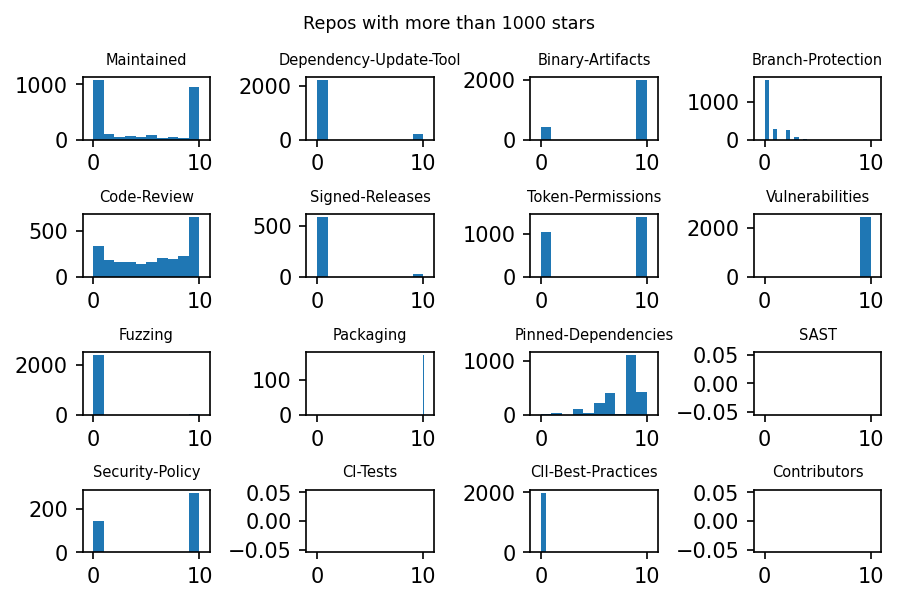

In [5]:

star_cache = scrape_stars([repos[i] for i in range(len(repos))])
#star_cache = read_star_cache()
repos = [r for r in repos if r["repo"]["name"] in star_cache]
high_star_cutoff = 1000

high_star_repos = [r for r in repos if star_cache[r["repo"]["name"]] > high_star_cutoff]
high_star_repos = sorted(high_star_repos, key=lambda r: star_cache[r["repo"]["name"]], reverse=True)
print("# high star repos:", len(high_star_repos))
print([(r["repo"]["name"], star_cache[r["repo"]["name"]]) for r in high_star_repos][:5])

check_scores = show_distribution_by_check_type(high_star_repos, title=f"Repos with more than {high_star_cutoff} stars")
view_reasons_behind_check("CI-Tests", check_scores)


0it [00:00, ?it/s]


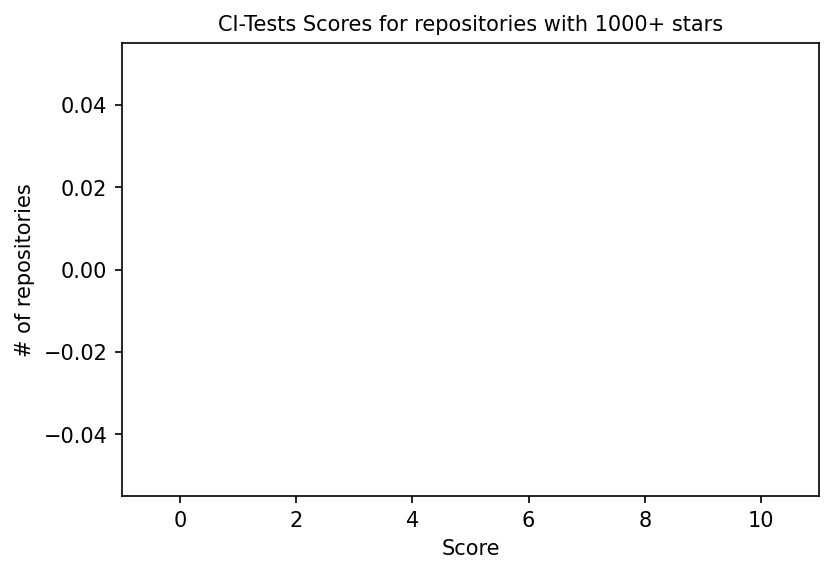

{}

In [6]:

CHECK = "CI-Tests"
show_distribution_by_single_check(high_star_repos, CHECK, CHECK + " Scores for repositories with 1000+ stars")